In [0]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file

File_ID = '14Mn5uSw9uFU9CiKd-_mLewAZ6hzpjYTZ'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('IMG_0372.JPG')


# For Coloring Image

original Image


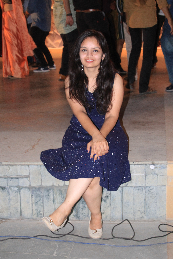

Merge all RGB


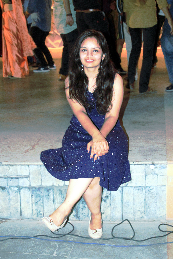

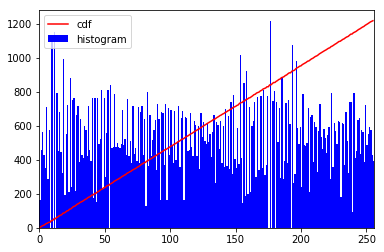

In [65]:
img=cv2.imread('IMG_0372.JPG')
img=cv2.resize(img,None,fx=.05,fy=.05,interpolation=cv2.INTER_CUBIC)
print('original Image')
cv2_imshow(img)

def histogram_equalize(img):
    b, g, r = cv2.split(img)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    return cv2.merge((blue, green, red))

img=histogram_equalize(img)
print('Merge all RGB')
cv2_imshow(img)
img_all=img
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


b, g, r = cv2.split(img)   
#blue=0 green=1 red=2


# Blue Image

Only BLUE


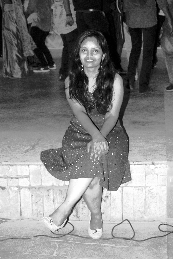

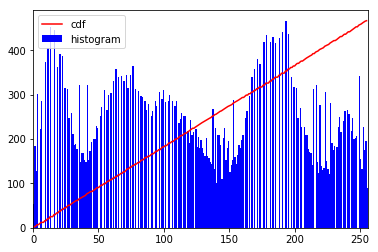

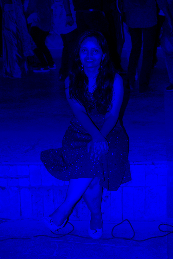

In [62]:
img=cv2.equalizeHist(b)
print('Only BLUE')
cv2_imshow(img)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

b_img=img_all.copy()
b_img[:,:,1]=0
b_img[:,:,2]=0
cv2_imshow(b_img)

# Green Image

Only GREEN


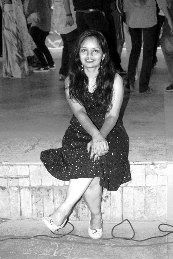

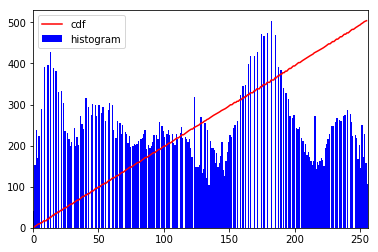

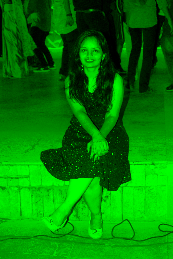

In [63]:
img=cv2.equalizeHist(g)
print('Only GREEN')
cv2_imshow(img)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

g_img=img_all.copy()
g_img[:,:,0]=0
g_img[:,:,2]=0
cv2_imshow(g_img)

# Red Image

Only RED


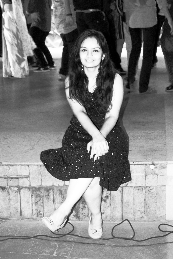

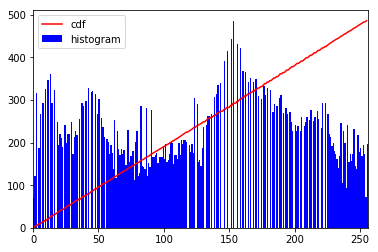

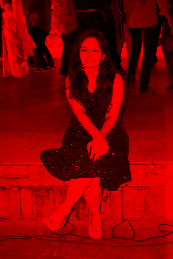

In [64]:

img=cv2.equalizeHist(r)
print('Only RED')
cv2_imshow(img)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'r')
plt.hist(img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


r_img=img_all.copy()
r_img[:,:,1]=0
r_img[:,:,0]=0
cv2_imshow(r_img)

# For Grey Scale Image

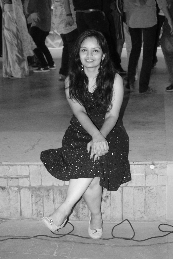

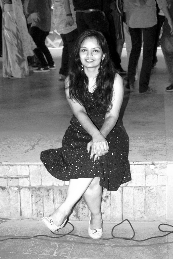

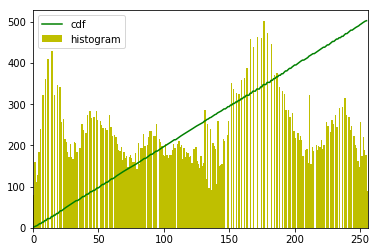

Histogram for equalized grey scale Image


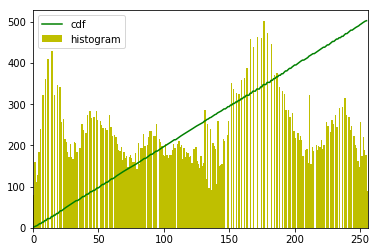

In [67]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('IMG_0372.JPG',0)
img=cv2.resize(img,None,fx=.05,fy=.05,interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)

img = cv2.equalizeHist(img)
cv2_imshow(equ)


hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'g')
plt.hist(img.flatten(),256,[0,256], color = 'y')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


print('Histogram for equalized grey scale Image')
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'g')
plt.hist(img.flatten(),256,[0,256], color = 'y')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
